In [72]:
import tensorflow.keras as keras
import os
import random
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow as tf
import datetime
import sys
from vaegan import encoder, generator
import matplotlib.pyplot as plt

In [48]:
DATA_DIR = "results/WorldModels/CarRacing-v0/record"
model_path_name = "results/WorldModels/CarRacing-v0/tf_vaegan"

In [49]:
filelist = os.listdir(DATA_DIR)

In [59]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [60]:
obs.shape

(1000, 64, 64, 3)

In [61]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

In [62]:
lr = 0.0001
E_opt = keras.optimizers.Adam(lr=lr)
G_opt = keras.optimizers.Adam(lr=lr)

In [63]:
G = generator()
E = encoder()
G.compile(optimizer=G_opt)
E.compile(optimizer=E_opt)

In [64]:
G.load_weights('results/WorldModels/CarRacing-v0/tf_vaegan/generator.h5')
E.load_weights('results/WorldModels/CarRacing-v0/tf_vaegan/encoder.h5')

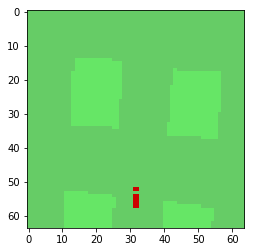

In [65]:
%matplotlib inline
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [66]:
batch_z = E.predict(frame)
print(batch_z[0])
reconstruct = G.predict(batch_z[0])

[[ 0.45867884  1.4893045  -1.2249688   0.14031488  1.3745396   1.3609726
  -0.96011496  1.1951406  -1.2679336   0.9356327  -1.6158421  -0.31651232
   2.207405   -0.05602863 -0.30032885 -1.0985434   0.252325   -0.5437205
   1.5530822   0.08220953  0.21667361 -0.8507894  -0.5934835   1.1859276
   0.4423824   0.9942652   0.00382155 -0.3410076   1.4391954   0.6898077
  -0.25452384 -0.05799621]]


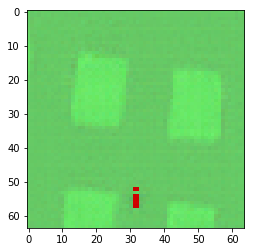

In [67]:
%matplotlib inline
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()

In [73]:
eager_filepath = os.path.join('results/WorldModels/CarRacing-v0/vaegan_log/CarRacing-v0.cma.16.4.eval_hist.json')
#og_filepath = os.path.join('results/og/log', 'carracing.cma.16.64.hist_best.json')
with open(eager_filepath, 'r') as f:
  eager_data = json.load(f)
#with open(og_filepath, 'r') as f:
#  og_data = json.load(f)

eager_data = np.array(eager_data)
#og_data = np.array(og_data)

eager_comparison_max = eager_data[-1, 0] # b/c we didnt run for 2k
#og_max_idx = np.sum(np.array(og_data[: ,0],dtype=np.float) <= eager_comparison_max)
#print(og_max_idx)

#og_data = np.array(og_data)[:og_max_idx]

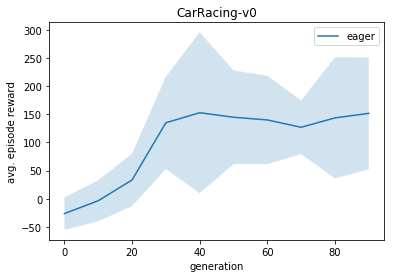

In [74]:
%matplotlib inline

eager_x = eager_data[:, 0]
eager_ret = eager_data[:, 1]
eager_std = eager_data[:, 2]

#og_x = np.array(og_data[:, 0], dtype=np.float)
#og_ret = np.array(og_data[:, 5], dtype=np.float)
# don't have access to standard deviation of the og evaluation

plt.figure()
plt.plot(eager_x, eager_ret)
plt.fill_between(eager_x, eager_ret-eager_std, eager_ret+eager_std, alpha=0.2)
#plt.plot(og_x, og_ret)

plt.title('CarRacing-v0')
plt.ylabel('avg. episode reward')
plt.xlabel('generation')
plt.legend(['eager'])